In [1]:
# These are the libraries will be used for this lab.
from torchvision import transforms
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import time
import matplotlib.pylab as plt
import numpy as np
import h5py
import os
import glob

In [2]:
directory="https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/"
#directory=""
positive="Positive_tensors"
negative='Negative_tensors'

positive_file_path=os.path.join(directory,positive)
negative_file_path=os.path.join(directory,negative)
positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]

In [3]:
negative_files[0], positive_files[0]

('https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Negative_tensors/6540.pt',
 'https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Positive_tensors/6540.pt')

In [9]:
transform = transforms.ToPILImage()
img=transform(t)

In [11]:
def show(sample, transform):
 
    # convert the tensor to PIL image using above transform
    img = transform(sample)

    # display the PIL image
    img.show()

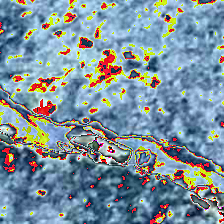

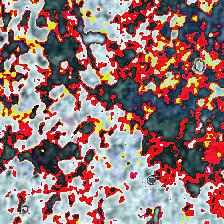

In [18]:
p1=torch.load(positive_files[1])
n1=torch.load(negative_files[1])
show(p1, transform)
show(n1, transform)


https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Positive_tensors/10350.pt https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Negative_tensors/3703.pt


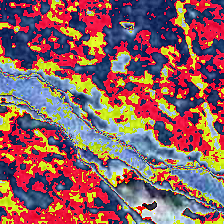

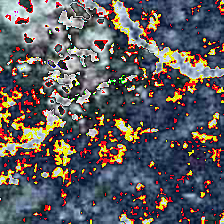

https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Positive_tensors/10142.pt https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Negative_tensors/17080.pt


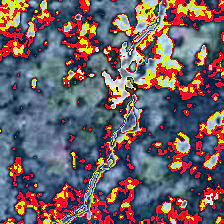

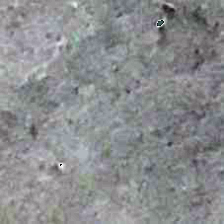

https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Positive_tensors/14217.pt https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Negative_tensors/2214.pt


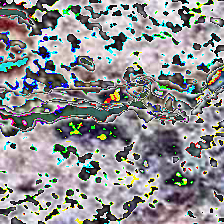

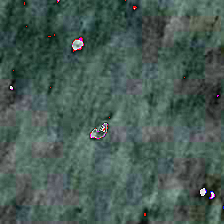

https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Positive_tensors/10580.pt https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Negative_tensors/14677.pt


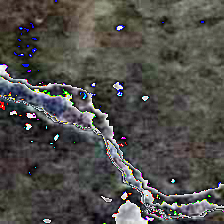

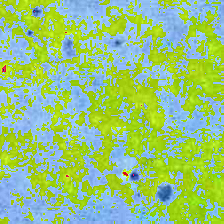

https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Positive_tensors/1269.pt https://s3.private.au-syd.cloud-object-storage.appdomain.cloud/ibm-ai-capstone-bucket/Resources/Negative_tensors/7165.pt


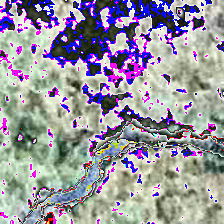

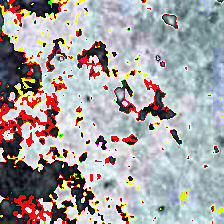

In [25]:
for p, n in zip(positive_files[10:15], negative_files[20:25]):
    print(p, n)
    img=torch.load(p)
    show(img, transform)
    img=torch.load(n)
    show(img, transform)

In [26]:

credentials = {
    'url': 'https://s3.au-syd.cloud-object-storage.appdomain.cloud',
    'api_key': 'G3p91JL6I-LSeEzChHi-7a3sHa5VEt0Qn-8zwPOSEoeY',
    'resource_instance_id': 'crn:v1:bluemix:public:cloud-object-storage:global:a/a4eded915eba49258c9cb8ac6e309eb3:6e7b0cd8-44b2-43d2-b086-fa76b1e161b3::',
    'iam_url': 'https://iam.cloud.ibm.com/identity/token',
    'bucket': 'ibm-ai-capstone-bucket'
}


In [27]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['api_key'],
    ibm_service_instance_id=credentials['resource_instance_id'],
    ibm_auth_endpoint=credentials['iam_url'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['url'])


In [32]:
savedmodel = cos.download_file(Filename='classifier_resnet18_model.h5',Bucket=credentials['bucket'], Key='classifier_resnet18_model.h5')

In [36]:
model = torch.load('classifier_resnet18_model.h5')

In [38]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [48]:
model.layer1[0].conv1

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [51]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

print()

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in model.optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([64, 3, 7, 7])
bn1.weight 	 torch.Size([64])
bn1.bias 	 torch.Size([64])
bn1.running_mean 	 torch.Size([64])
bn1.running_var 	 torch.Size([64])
bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv1.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight 	 torch.Size([64])
layer1.0.bn1.bias 	 torch.Size([64])
layer1.0.bn1.running_mean 	 torch.Size([64])
layer1.0.bn1.running_var 	 torch.Size([64])
layer1.0.bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight 	 torch.Size([64])
layer1.0.bn2.bias 	 torch.Size([64])
layer1.0.bn2.running_mean 	 torch.Size([64])
layer1.0.bn2.running_var 	 torch.Size([64])
layer1.0.bn2.num_batches_tracked 	 torch.Size([])
layer1.1.conv1.weight 	 torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight 	 torch.Size([64])
layer1.1.bn1.bias 	 torch.Size([64])
layer1.1.bn1.running_mean 	 torch.Size([64])
layer1.1.bn1.running_var 	 torch.Size([64])
layer1.1.bn1.num_batc

ModuleAttributeError: 'ResNet' object has no attribute 'optimizer'